#📌 Extracción

In [1]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
#Convirtiendo data en diccionario
data = response.json()

#Normalizando las columnas del json y transformar en dataframe data
datos = pd.json_normalize(data)

datos.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [2]:
#obtener el detalle de las columnas para ver cuantas son, que tipo de dato tienen y si cuentan con datos nulos
datos.info()
#Contamos con 21 columnas de datos sin valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [3]:
datos.isnull().sum()#validando que no hay valores nulos

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [4]:
datos.sample(5)
#Procedemos a entender los datos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
6499,8932-CZHRQ,No,Male,0,No,No,68,Yes,Yes,DSL,...,Yes,Yes,No,No,Yes,One year,No,Credit card (automatic),76.75,5233.25
4172,5712-VBOXD,No,Female,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.15,68.45
3410,4719-UMSIY,No,Male,0,No,Yes,6,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,100.9
5734,7839-NUIAA,No,Female,0,Yes,Yes,61,Yes,Yes,DSL,...,Yes,No,No,No,No,Month-to-month,No,Electronic check,59.80,3641.5
2577,3590-TCXTB,No,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,20.35


In [5]:
#Visualizando los valores unicos de cada columna
unique_values = {col: datos[col].unique() for col in datos.columns}
unique_values
#Por modificar Churn, phone.MultipleLines, internet.OnlineSecurity, internet.OnlineBackup,internet.DeviceProtection,
#internet.TechSupport, internet.StreamingTV, internet.StreamingMovies (No phone service --> No, No internet service
#--> No)

{'customerID': array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
        '9993-LHIEB', '9995-HOTOH'], dtype=object),
 'Churn': array(['No', 'Yes', ''], dtype=object),
 'customer.gender': array(['Female', 'Male'], dtype=object),
 'customer.SeniorCitizen': array([0, 1]),
 'customer.Partner': array(['Yes', 'No'], dtype=object),
 'customer.Dependents': array(['Yes', 'No'], dtype=object),
 'customer.tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
        35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
        17, 18, 38, 42,  0]),
 'phone.PhoneService': array(['Yes', 'No'], dtype=object),
 'phone.MultipleLines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'internet.InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'internet.OnlineSecuri

In [6]:
#Reemplazamos los valores No phone service por No y No internet service por No
datos.replace('No phone service','No', inplace=True)
datos.replace('No internet service','No', inplace=True)

In [7]:
#Reemplazamos el valor '' en Churn por No
datos.replace('', 'No', inplace=True)
datos['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
#Con este codigo confirmamos que solo se tiene valores vacios en la columna Churn que vamos a reemplazar con No
datos.replace('', pd.NA).isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [9]:
#Columnas que vamos a modificar el Yes y No
columns_to_modify = ['Churn','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines',
                     'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                     'internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.PaperlessBilling']

In [10]:
#Reemplazamos los valores de Yes y No por 1 y 0
for column in columns_to_modify:
    datos[column].replace('Yes', 1, inplace=True)
    datos[column].replace('No', 0, inplace=True)

datos.sample(10)

/tmp/ipython-input-495910883.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos[column].replace('Yes', 1, inplace=True)
/tmp/ipython-input-495910883.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
4958,6771-XWBDM,1,Female,0,1,0,57,1,1,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Credit card (automatic),104.50,5921.35
2202,3079-BCHLN,0,Male,0,1,0,47,1,0,No,...,0,0,0,0,0,One year,0,Bank transfer (automatic),19.90,942.95
6544,8992-OBVDG,0,Male,0,0,0,21,1,0,DSL,...,0,1,0,0,1,Month-to-month,0,Mailed check,61.65,1393.6
5290,7233-DRTRF,0,Male,0,1,0,63,1,1,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,102.40,6444.05
1507,2167-FQSTQ,0,Female,0,1,0,72,1,1,DSL,...,1,1,1,1,1,Two year,1,Electronic check,92.40,6786.1
737,1053-MXTTK,0,Female,0,1,1,72,1,0,Fiber optic,...,1,1,1,1,1,Two year,1,Bank transfer (automatic),108.65,7726.35
5052,6904-JLBGY,0,Female,1,0,0,72,1,1,Fiber optic,...,1,1,1,1,1,Two year,1,Credit card (automatic),117.35,8436.25
3317,4625-LAMOB,0,Male,0,0,0,44,1,0,No,...,0,0,0,0,0,Two year,0,Credit card (automatic),20.40,905.55
4903,6702-OHFWR,1,Male,1,0,0,1,0,0,DSL,...,1,1,0,0,1,Month-to-month,1,Electronic check,43.30,43.3
2759,3810-PJUHR,0,Male,0,1,1,70,1,1,No,...,0,0,0,0,0,Two year,0,Mailed check,25.35,1715.15


In [11]:
unique_values = {col: datos[col].unique() for col in datos.columns}
unique_values
#separamos las variables categoricas de las variables

{'customerID': array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
        '9993-LHIEB', '9995-HOTOH'], dtype=object),
 'Churn': array([0, 1]),
 'customer.gender': array(['Female', 'Male'], dtype=object),
 'customer.SeniorCitizen': array([0, 1]),
 'customer.Partner': array([1, 0]),
 'customer.Dependents': array([1, 0]),
 'customer.tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
        35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
        17, 18, 38, 42,  0]),
 'phone.PhoneService': array([1, 0]),
 'phone.MultipleLines': array([0, 1]),
 'internet.InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'internet.OnlineSecurity': array([0, 1]),
 'internet.OnlineBackup': array([1, 0]),
 'internet.DeviceProtection': array([0, 1]),
 'internet.TechSupport'

In [12]:
datos['Cuentas_Diarias'] = datos['account.Charges.Monthly']/30
datos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [13]:
datos['account.Charges.Total'] = pd.to_numeric(datos['account.Charges.Total'], errors='coerce')
datos['account.Charges.Total'] = datos['account.Charges.Total'].fillna(0)

In [14]:
datos.dtypes

,0
customerID,object
Churn,int64
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,int64
customer.Dependents,int64
customer.tenure,int64
phone.PhoneService,int64
phone.MultipleLines,int64
internet.InternetService,object


In [15]:
#Dividimos las variables que tenemos en cualitativas y cuantitativas
var_cualitativas = ['customerID','Churn','customer.gender','customer.SeniorCitizen','customer.Partner','customer.Dependents',
                    'phone.PhoneService','phone.MultipleLines','internet.OnlineSecurity','internet.OnlineBackup',
                    'internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies',
                    'account.Contract','account.PaperlessBilling','account.PaymentMethod']
var_cuantitativas = ['customer.tenure','account.Charges.Monthly','account.Charges.Total','Cuentas_Diarias']

In [16]:
#Modificar los tipos de las variables cualitativas
datos[var_cualitativas] = datos[var_cualitativas].astype('object')

In [17]:
#Modificar los tipos de las variables cuantitativas
datos[var_cuantitativas] = datos[var_cuantitativas].astype('float')

In [18]:
datos.dtypes#ahora si los tipos estan correctos para trabajarlos

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,object
customer.Partner,object
customer.Dependents,object
customer.tenure,float64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


#📊 Carga y análisis

In [19]:
# Para variables numéricas obtenemos medidas estadisticas
datos[var_cuantitativas].describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


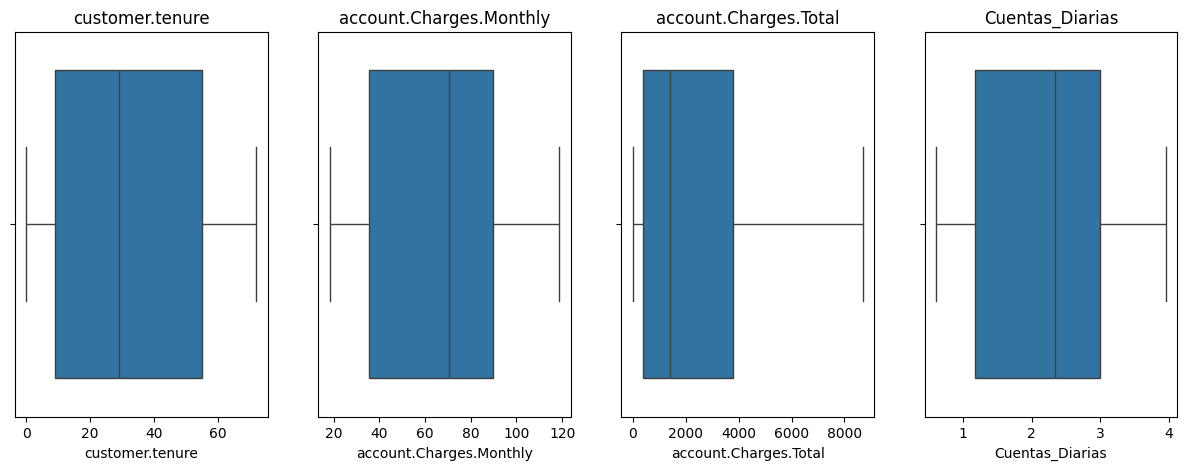

In [20]:
#Realizamos los graficos boxplot para las 4 variables
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i in range (0,4):
  sns.boxplot(x=datos[var_cuantitativas[i]], ax=axs[i])
  axs[i].set_title(var_cuantitativas[i])

plt.show()

In [21]:
# Para variables categóricas
datos[var_cualitativas].describe(include='O')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,4
top,9995-HOTOH,0,Male,0,0,0,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check
freq,1,5398,3675,6085,3749,5086,6560,4202,5189,4763,4776,5163,4477,4451,4005,4311,2445


<Axes: xlabel='Churn', ylabel='count'>

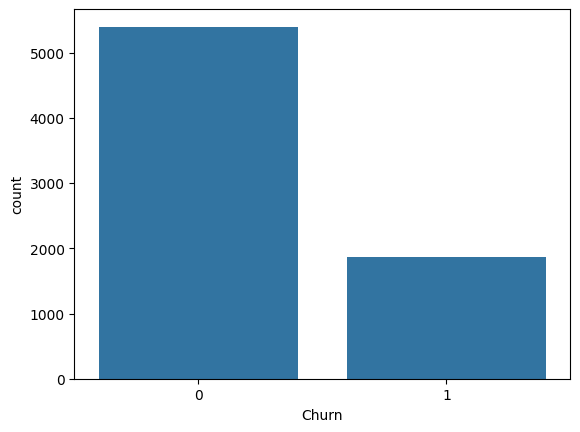

In [22]:
#Se realiza un grafico de barras simple para visualizar el numero de clientes que permanecieron (x=0) y
# los que se dieron de baja (x=1)
sns.countplot(x='Churn', data=datos)

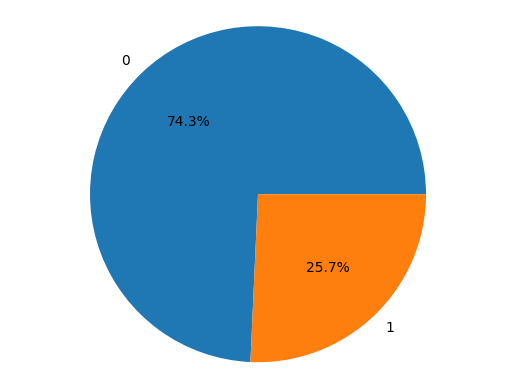

In [23]:
#Se crea un grafico circular para observar que el 25.7% de los registros corresponden a personas que
#se dieron de baja
plt.pie(datos['Churn'].value_counts(), labels=datos['Churn'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Distribucion de la evasion segun variables categoricas

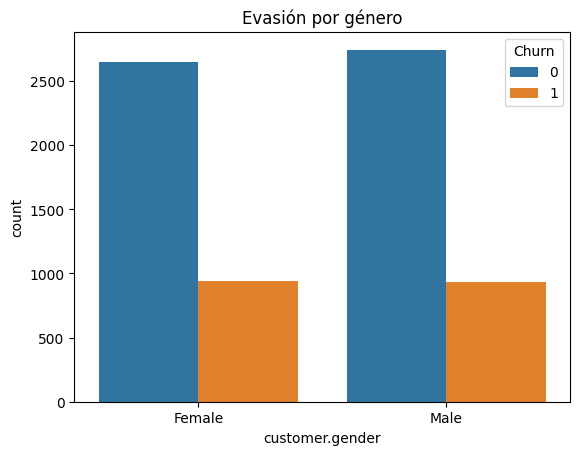

In [24]:
# Género vs evasión
sns.countplot(x='customer.gender', hue='Churn', data=datos)
plt.title("Evasión por género")
plt.show()

#Para el caso de genero no hay ninguna distincion en el nivel de evasion o retiro

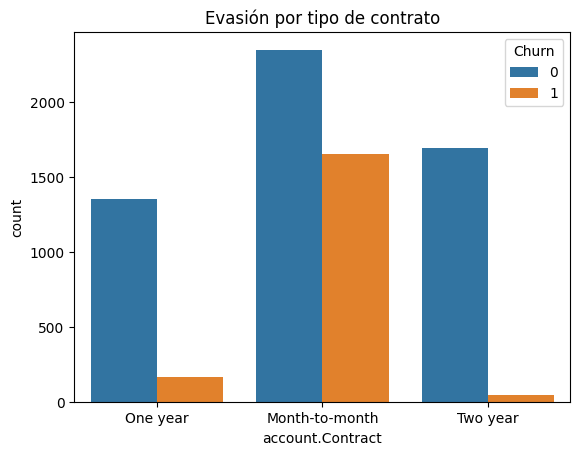

In [25]:
# Contrato vs evasión
sns.countplot(x='account.Contract', hue='Churn', data=datos)
plt.title("Evasión por tipo de contrato")
plt.show()
#Se observa que los clientes con contrato de 1 o 2 anios tienen un nivel de retiro batante bajo en comparacion
#con los que tienen contrato mes a mes

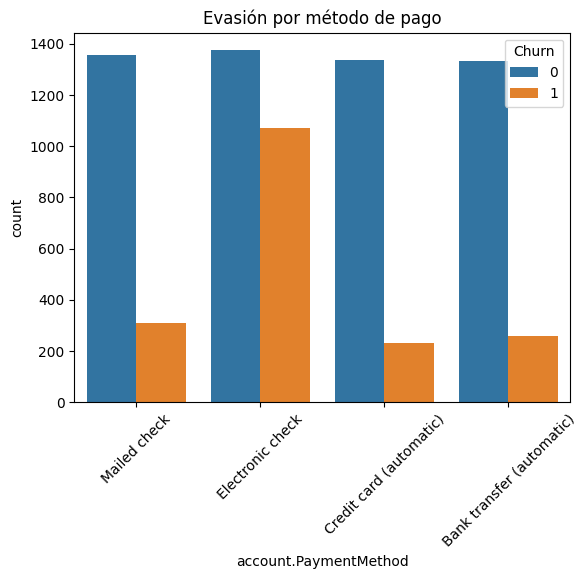

In [26]:
# Método de pago vs evasión
sns.countplot(x='account.PaymentMethod', hue='Churn', data=datos)
plt.title("Evasión por método de pago")
plt.xticks(rotation=45)
plt.show()
#Para el caso del tipo de metodo de pago, los metodos automaticos y mailed check mantienen un % bajo de baja
#sin embargo loss clientes con el metodo de pago por electronic check son los que tienen mayor rotaci[on.

Distribucion de la evasion segun variables numericas

In [27]:
var_cuantitativas

['customer.tenure',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'Cuentas_Diarias']

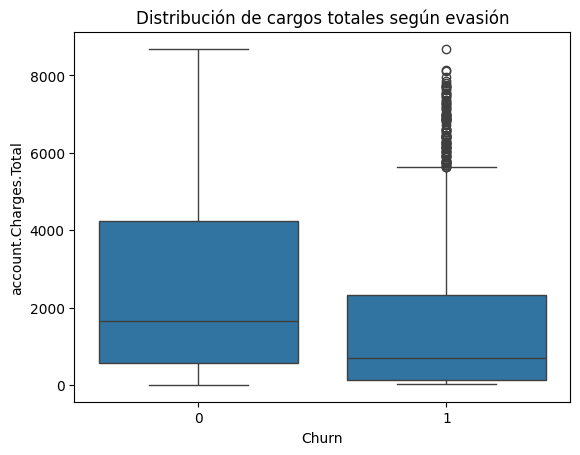

In [28]:
# Cargos totales vs Churn
sns.boxplot(x='Churn', y='account.Charges.Total', data=datos)
plt.title("Distribución de cargos totales según evasión")
plt.show()
#Se observa que los que tienen un menor pago total son los que tienen mayor probabilidad de irse

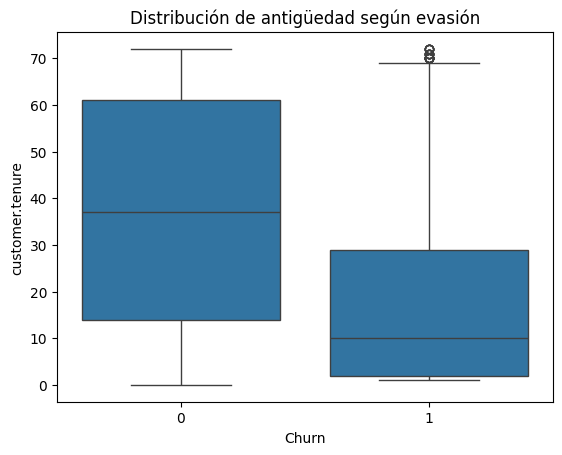

In [29]:
# Tenure (tiempo como cliente) vs Churn
sns.boxplot(x='Churn', y='customer.tenure', data=datos)
plt.title("Distribución de antigüedad según evasión")
plt.show()
#los que tienen menor tiempo como clientes son los mas propensos a retirarse con algunas excepciones atipicas

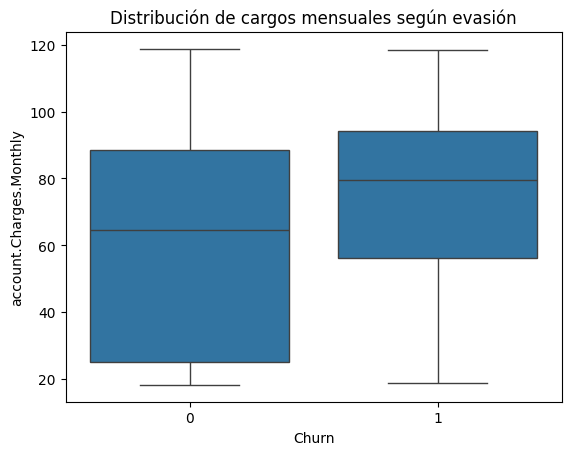

In [30]:
# Cargos mensuales vs Churn
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=datos)
plt.title("Distribución de cargos mensuales según evasión")
plt.show()
#Se observa que las personas con cargos mensuales altos, son los mas propensos en retirarse

#📄Informe final

##Introduccion

El objetivo de este Desafio es realizar la preparacion de la data y exploracion basica de la misma, para prepararse para la realizacion de modelos predictivos y desarrollo de estrategias de reduccion de evasion

##Limpieza y tratamiendo de datos

Primero se importo la data desde el API con la ayuda de requests y json las cuales se importaron en el codigo inicial.

Se realizo la normalizacion de la data json y luego se transformo a un dataframe con el cual se trabajo toda la informacion.

Luego se reviso que no existieran valores nulos en nuestra data y se revisaron los valores unicos de las columnas, para encontrar data repetida o mal clasificada, asi como informacion incongruente que se corrigio.

Por ultimo se transformo los valores categoricos a entero y se modificaron los tipos segun el tipo de variable.

##Analisis exploratorio de Datos

Primeramente revisamos la proporcion entre los valores de Si y No para los clientes que se retiran o no. En este grafico visualizamos que l mayor parte de clientes no se han dado de baja.

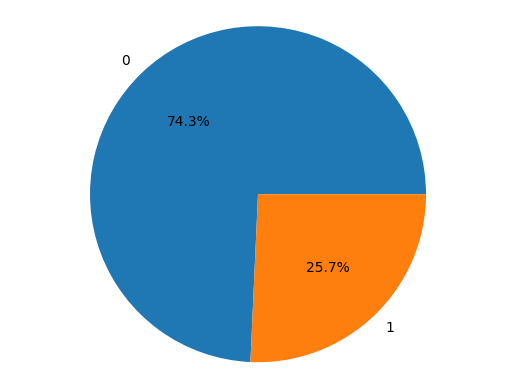

Seguidamente se evaluan por encima las relaciones de las variables o columnas de la informacion brindada respecto a la variable de Churn, para tratar de entender el comportamiento de los clientes de retiro, respecto a las diferentes variables cualitativas y cuantitativas

Para el caso de las variables categoricas se tomaron en cuenta las variables: el genero del cliente, tiempo de contrato y metodo de pago con las cuales se observa la relacion de estas con el retiro de los clientes.

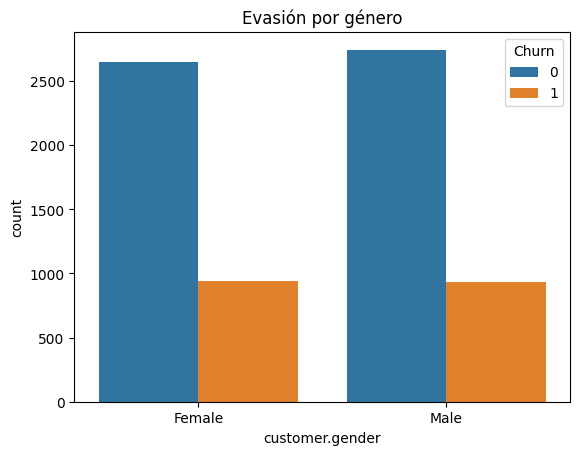

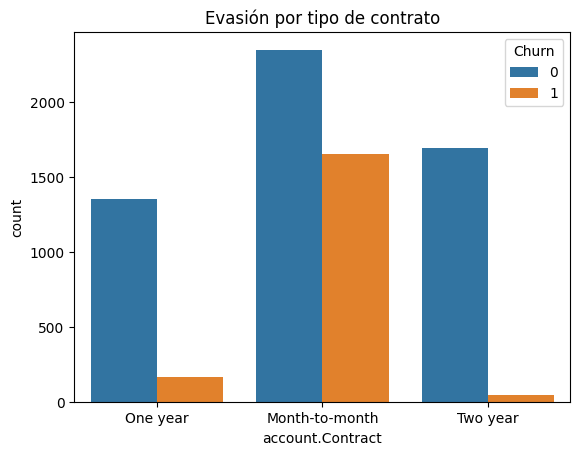

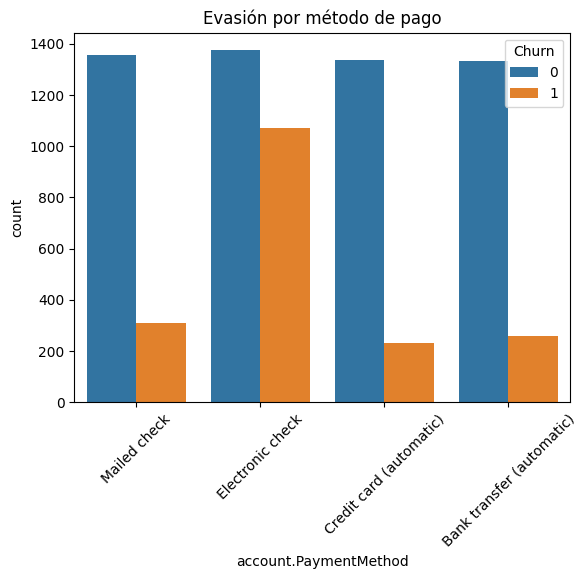

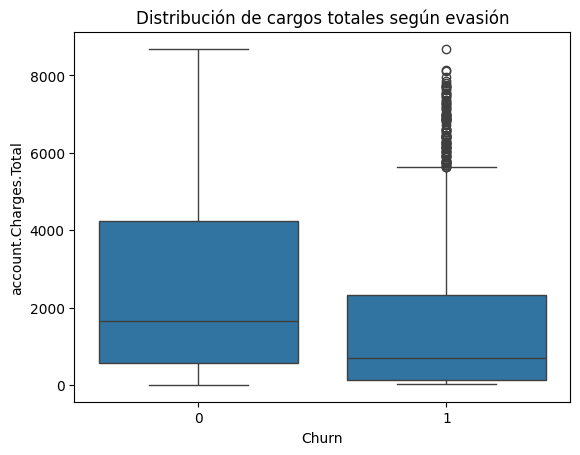

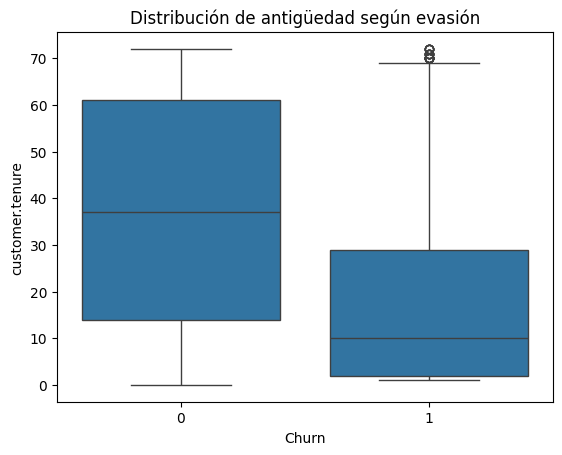

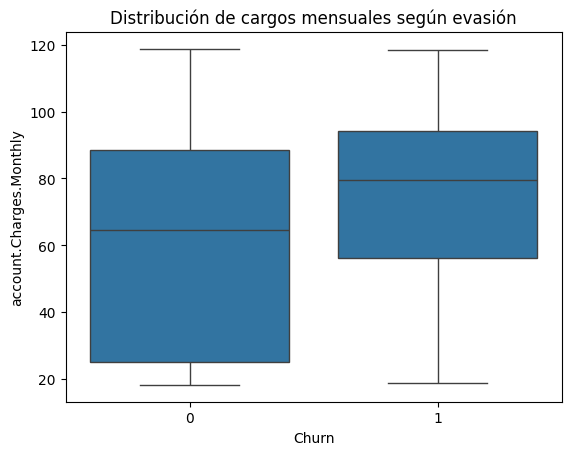

Producto de la revision de las variables cuantitativas respecto al Churn, observamos unas caracteristicas similares de los clientes que se retiran

In [31]:
#Se observa que los que tienen un menor pago total son los que tienen mayor probabilidad de irse
#Se observa que las personas con cargos mensuales altos, son los mas propensos en retirarse
#los que tienen menor tiempo como clientes son los mas propensos a retirarse con algunas excepciones atipicas

## Conclusiones e Insights

Los clientes con un contrato de pago mes a mes y cuyo metodo de pago es electronic check tienen una mayor tendencia a retirarse. Este comportamiento se observa mas para clientes mas recientes. Asi mismo se observa unos cargos mensuales altos para los clientes que se retiraron.

El Genero del cliente es irrelevante para entender las causas del retiro.

Recomendaciones:
1. Revisar los importes de pagos mensuales especialmente para clientes nuevos para engancharlos y evitar su retiro.
2. Brindar facilidad de pago a los clientes promoviendo el pago anual y contratos por mas de 1 anio. El negocio esta en los contratos largos

In [32]:
#Guardando la dataframe trabajada para la parte2
datos.to_csv('datos_tratados.csv',index = False)